# Edwin Zhou   

## Research question/interests

My research question: I want to know how video games changed over time

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Pipeline

In [2]:
tempdataset = pd.read_csv("../data/raw/steam_games.csv")
tempdataset.head()

,url,types,name,desc_snippet,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,game_description,mature_content,minimum_requirements,recommended_requirements,original_price,discount_price
0,https://store.steampowered.com/app/379720/DOOM/,app,DOOM,Now includes all three premium DLC packs (Unto...,"Very Positive,(554),- 89% of the 554 user revi...","Very Positive,(42,550),- 92% of the 42,550 use...","May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,"About This Game Developed by id software, the...",NaN,"Minimum:,OS:,Windows 7/8.1/10 (64-bit versions...","Recommended:,OS:,Windows 7/8.1/10 (64-bit vers...",$19.99,$14.99
1,https://store.steampowered.com/app/578080/PLAY...,app,PLAYERUNKNOWN'S BATTLEGROUNDS,PLAYERUNKNOWN'S BATTLEGROUNDS is a battle roya...,"Mixed,(6,214),- 49% of the 6,214 user reviews ...","Mixed,(836,608),- 49% of the 836,608 user revi...","Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",About This Game PLAYERUNKNOWN'S BATTLEGROUND...,Mature Content Description The developers de...,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$29.99,NaN
2,https://store.steampowered.com/app/637090/BATT...,app,BATTLETECH,Take command of your own mercenary outfit of '...,"Mixed,(166),- 54% of the 166 user reviews in t...","Mostly Positive,(7,030),- 71% of the 7,030 use...","Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",About This Game From original BATTLETECH/Mec...,NaN,"Minimum:,Requires a 64-bit processor and opera...","Recommended:,Requires a 64-bit processor and o...",$39.99,NaN
3,https://store.steampowered.com/app/221100/DayZ/,app,DayZ,The post-soviet country of Chernarus is struck...,"Mixed,(932),- 57% of the 932 user reviews in t...","Mixed,(167,115),- 61% of the 167,115 user revi...","Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",About This Game The post-soviet country of Ch...,NaN,"Minimum:,OS:,Windows 7/8.1 64-bit,Processor:,I...","Recommended:,OS:,Windows 10 64-bit,Processor:,...",$44.99,NaN
4,https://store.steampowered.com/app/8500/EVE_On...,app,EVE Online,EVE Online is a community-driven spaceship MMO...,"Mixed,(287),- 54% of the 287 user reviews in t...","Mostly Positive,(11,481),- 74% of the 11,481 u...","May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",About This Game,NaN,"Minimum:,OS:,Windows 7,Processor:,Intel Dual C...","Recommended:,OS:,Windows 10,Processor:,Intel i...",Free,NaN


### From the describe function here we can see that this dataset really needs to be cleaned and wrangled to be of any use

In [3]:
tempdataset.describe()

,achievements
count,12194.000000
mean,77.237494
std,448.501848
min,1.000000
25%,12.000000
50%,21.000000
75%,38.000000
max,9821.000000


### I removed useless columns, got rid of "bundle" entries, and converted review text into numeric values

In [4]:
import re
import project_functions1 as pf

# dataset = (
#     tempdataset
#     [tempdataset['types'] != 'bundle']
#     .drop(columns = ['url', 'game_description', 'minimum_requirements', 'recommended_requirements', 'desc_snippet', 'mature_content', 'types', 'discount_price'])
#     [tempdataset['all_reviews'].notna() & tempdataset['all_reviews'].str.contains('%')]
#     .assign(all_reviews = lambda x: x['all_reviews'].apply(lambda y: int(re.findall("(\d{1,3}%)", y)[0].replace('%', ''))))
#     [tempdataset['recent_reviews'].notna() & tempdataset['recent_reviews'].str.contains('%')]
#     .assign(recent_reviews = lambda x: x['recent_reviews'].apply(lambda y: int(re.findall("(\d{1,3}%)", y)[0].replace('%', ''))))
#     [tempdataset['original_price'].notna() & (tempdataset['original_price'].str.contains('\$') | tempdataset['original_price'].str.contains('free', case=False))]
#     .assign(original_price = lambda x: x['original_price'].apply(lambda y: 0 if 'free' in y.lower() else float(y.replace('$', ''))))
# )

dataset = pf.dataloadnclean("../data/raw/steam_games.csv")

dataset.head()

c:\Users\Zecr\Offline Storage\UBC 2022-2023 Code Files\301\project-group15\notebooks\project_functions1.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset


,name,recent_reviews,all_reviews,release_date,developer,publisher,popular_tags,game_details,languages,achievements,genre,original_price
0,DOOM,89,92,"May 12, 2016",id Software,"Bethesda Softworks,Bethesda Softworks","FPS,Gore,Action,Demons,Shooter,First-Person,Gr...","Single-player,Multi-player,Co-op,Steam Achieve...","English,French,Italian,German,Spanish - Spain,...",54.0,Action,19.99
1,PLAYERUNKNOWN'S BATTLEGROUNDS,49,49,"Dec 21, 2017",PUBG Corporation,"PUBG Corporation,PUBG Corporation","Survival,Shooter,Multiplayer,Battle Royale,PvP...","Multi-player,Online Multi-Player,Stats","English,Korean,Simplified Chinese,French,Germa...",37.0,"Action,Adventure,Massively Multiplayer",29.99
2,BATTLETECH,54,71,"Apr 24, 2018",Harebrained Schemes,"Paradox Interactive,Paradox Interactive","Mechs,Strategy,Turn-Based,Turn-Based Tactics,S...","Single-player,Multi-player,Online Multi-Player...","English,French,German,Russian",128.0,"Action,Adventure,Strategy",39.99
3,DayZ,57,61,"Dec 13, 2018",Bohemia Interactive,"Bohemia Interactive,Bohemia Interactive","Survival,Zombies,Open World,Multiplayer,PvP,Ma...","Multi-player,Online Multi-Player,Steam Worksho...","English,French,Italian,German,Spanish - Spain,...",NaN,"Action,Adventure,Massively Multiplayer",44.99
4,EVE Online,54,74,"May 6, 2003",CCP,"CCP,CCP","Space,Massively Multiplayer,Sci-fi,Sandbox,MMO...","Multi-player,Online Multi-Player,MMO,Co-op,Onl...","English,German,Russian,French",NaN,"Action,Free to Play,Massively Multiplayer,RPG,...",0.00


In [66]:
dataset['game_details'].unique()

array(['Single-player,Multi-player,Co-op,Steam Achievements,Steam Trading Cards,Partial Controller Support,Steam Cloud',
       'Multi-player,Online Multi-Player,Stats',
       'Single-player,Multi-player,Online Multi-Player,Cross-Platform Multiplayer,Steam Achievements,Steam Trading Cards,Steam Cloud',
       ..., 'Downloadable Content',
       'Single-player,Steam Achievements,Full controller support,Steam Cloud,Stats,Steam Leaderboards,Includes level editor',
       'Single-player,Online Multi-Player,Shared/Split Screen,Steam Achievements,Full controller support,Steam Trading Cards'],
      dtype=object)

### The data is now much more usable

In [5]:
dataset.describe()

,recent_reviews,all_reviews,achievements,original_price
count,2638.000000,2638.000000,1779.000000,2638.000000
mean,77.420773,81.037908,79.600899,17.194272
std,17.067878,13.453444,305.988312,24.431361
min,0.000000,12.000000,1.000000,0.000000
25%,68.000000,74.000000,21.000000,3.990000
50%,81.000000,84.000000,37.000000,14.990000
75%,90.000000,91.000000,59.000000,19.990000
max,100.000000,100.000000,5000.000000,598.000000


34294

# Analysis

### There seems to be an exponential trend for the number of games released year over year. Which matches with technological progress. Since the data was collected in 2019, the last two bars do not match the trend as not all games have been released yet.

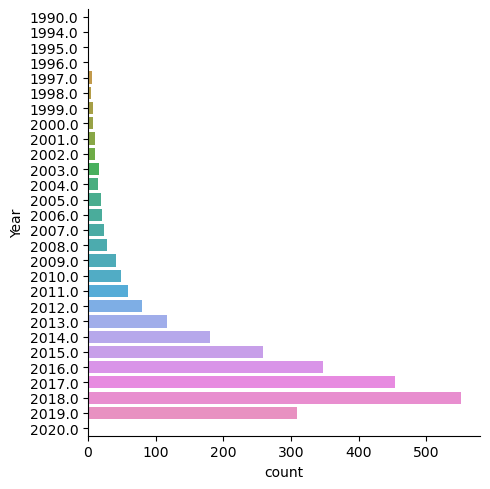

In [6]:
dataset['Year'] = pd.to_numeric(dataset['release_date'].str[-4:], errors='coerce')
sns.catplot(y="Year", kind="count", data=dataset)

### We can also see that the price of games have gone up over the years. This might be due to inflation or to the massive complexity of modern games that require more money

In [41]:
print(dataset['original_price'].sort_values(ascending=False).head(2))
print(dataset['original_price'].sort_values(ascending=True).head(2))

1427    598.00
450     269.69
Name: original_price, dtype: float64
7616    0.0
7951    0.0
Name: original_price, dtype: float64


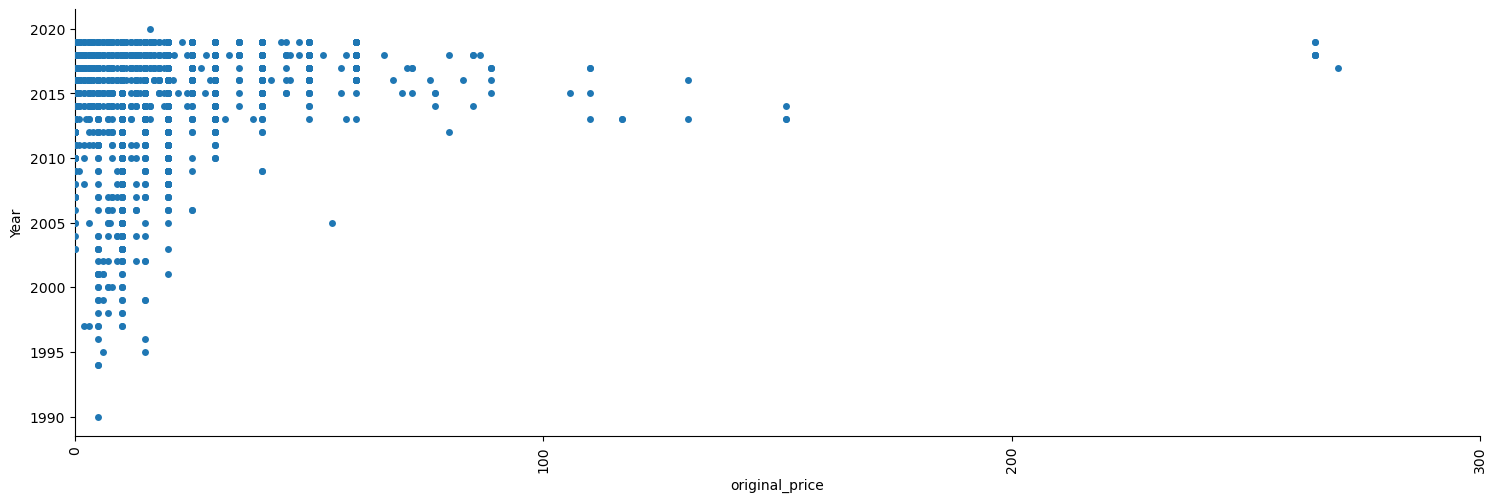

In [55]:
# set scale limit to 300 as there are some outliers
sns.catplot(x="original_price", y='Year', data=dataset, native_scale=True, aspect=3).set_xticklabels(rotation=90).set(xlim=(0,300))

### We can see from this graph, more and more games have been implementing achevements when compared to older games.

<AxesSubplot:xlabel='achievements', ylabel='Year'>

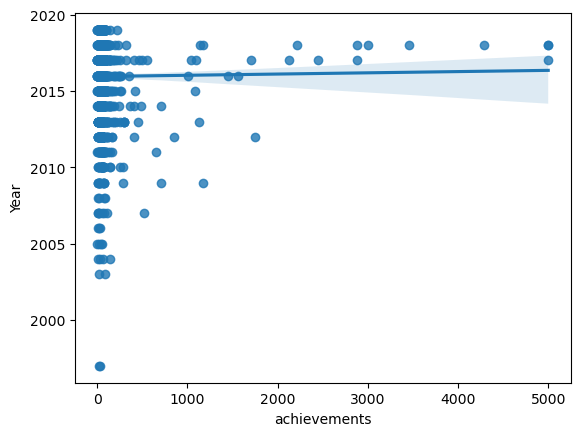

In [85]:
sns.regplot(x='achievements', y='Year', data=dataset)

### This next graphs I want to see when games started implementing multiplayer

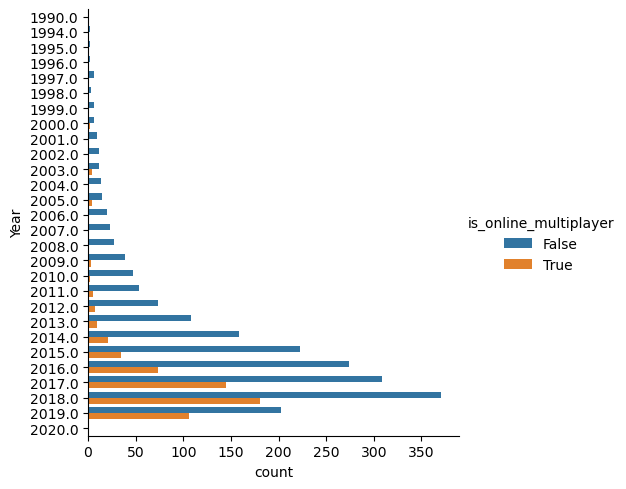

In [99]:
dataset['is_multiplayer'] = np.where(dataset['game_details'].str.contains('multi', case=False), True, False)
dataset['is_online'] = np.where(dataset['game_details'].str.contains('online', case=False), True, False)
dataset['is_online_multiplayer'] = np.where((dataset['is_multiplayer'] == True) & (dataset['is_online'] == True), True, False)

sns.catplot(kind="count", data=dataset, y='Year', hue='is_online_multiplayer')